<a href="https://colab.research.google.com/github/fitrieratna/DataScience-Portfolio/blob/master/Fraud%20Detection%20in%20Credit%20Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preparation

In [276]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.metrics import mean_squared_error,classification_report,make_scorer,accuracy_score,plot_roc_curve,auc,roc_curve, confusion_matrix, accuracy_score, roc_auc_score, plot_roc_curve, classification_report,precision_score, recall_score
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np


import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


import warnings
warnings.filterwarnings("ignore")

In [277]:
# To connect Google Drive (GDrive) with Colab
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [278]:
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/IBM - Keras Deep Learning Course/creditcard.csv', encoding='unicode_escape' )

# Exploratory Data Analysis

In [9]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [291]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
data.shape

(284807, 31)

In [85]:
missing_data = data.isnull()

for column in missing_data.columns.values.tolist():
 print (column)
 print (missing_data[column].value_counts())
 print("")  

Time
False    284807
Name: Time, dtype: int64

V1
False    284807
Name: V1, dtype: int64

V2
False    284807
Name: V2, dtype: int64

V3
False    284807
Name: V3, dtype: int64

V4
False    284807
Name: V4, dtype: int64

V5
False    284807
Name: V5, dtype: int64

V6
False    284807
Name: V6, dtype: int64

V7
False    284807
Name: V7, dtype: int64

V8
False    284807
Name: V8, dtype: int64

V9
False    284807
Name: V9, dtype: int64

V10
False    284807
Name: V10, dtype: int64

V11
False    284807
Name: V11, dtype: int64

V12
False    284807
Name: V12, dtype: int64

V13
False    284807
Name: V13, dtype: int64

V14
False    284807
Name: V14, dtype: int64

V15
False    284807
Name: V15, dtype: int64

V16
False    284807
Name: V16, dtype: int64

V17
False    284807
Name: V17, dtype: int64

V18
False    284807
Name: V18, dtype: int64

V19
False    284807
Name: V19, dtype: int64

V20
False    284807
Name: V20, dtype: int64

V21
False    284807
Name: V21, dtype: int64

V22
False    284807
Name: 

In [11]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
data.Class.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

No missing values found. 

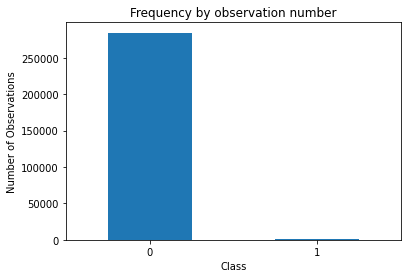

In [87]:
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)

plt.xticks(range(len(data['Class'].unique())), data.Class.unique())
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

From bar chart above we know that the dataset is imbalanced, with only 0.1% classified in Fraud transaction. 

Now take a closer look on what amount transaction are more probable to fraud? 

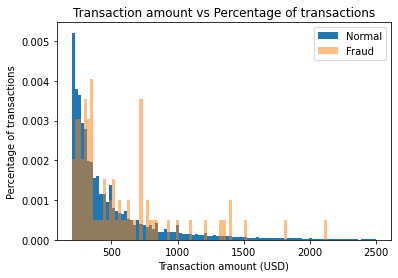

In [95]:
# Save the normal and fradulent transactions in separate dataframe
normal_dataset = data[data.Class == 0] 
fraud_dataset = data[data.Class == 1]

#Visualize transaction amounts for normal and fraudulent transactions
bins = np.linspace(200, 2500, 100)
plt.hist(normal_dataset.Amount, bins=bins, alpha=1, density=True, label='Normal')
plt.hist(fraud_dataset.Amount, bins=bins, alpha=0.5, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Transaction amount vs Percentage of transactions")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions");
plt.show()

Fraudulent transcation is more probable when transaction is below USD 1000, especially around USD 250 and USD 750.

Before we run any machine learning or deep learning model, we should understand what aim we targeted, is it high recall or high prediction? Or both? 

Fraud is financial crime in any banking insitution which preferably focus on how we reduce false negative (predicted non-fraud, actually fraud), so that we can mitigate any alleged or suspected fraud. 

But if banking insitution wanted to do both, mitigate early of alleged fraud and paralelly protect loyality from most of customer by not to block if there's alleged fraud, then we should care about F1-Score evaluation matrix, as it is evaluation metrix of balance between precision and recall.

# Machine Learning & Deep Learning Model

### 1. Dummy Classifier

In [196]:
def classification_report_with_validation(y_true, y_pred):
    real_values.extend(y_true)
    predicted_values.extend(y_pred)
    return accuracy_score(y_true, y_pred)

In [197]:
def print_stats(labels, predictions):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))
  print('F1 Score = {}'.format(f1_score(labels, predictions)))
  print('AUC_1 Score = {}'.format(auc(fpr1,tpr1)))

In [198]:
X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [199]:
dummy = DummyClassifier(strategy='most_frequent')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

dummy.fit(X_train, y_train)

result = cross_val_score(dummy, X_train, y_train,  scoring='accuracy',cv=cv)

print(f'{round(np.mean(result),6)}')

0.998275


With simple dummy classifier, model can predict with accuracy 99.8%. But the question is, does the model could predict greatly about suspected fraud? Let us check to confusion matrix.

In [200]:
yhat_dummy = dummy.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_dummy, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_dummy))

#print(score_df)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.00      0.00      0.00       148

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



From the confusion matrix above we know that the precision and recall generate by dummy classifier is poor, both 50%. 


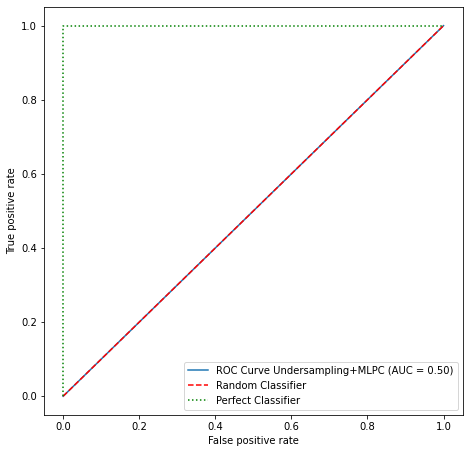

In [201]:
fpr1, tpr1, thresholds = roc_curve(y_test, yhat_dummy, pos_label=1)
roc_auc1 = auc(fpr1, tpr1)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
 
plt.plot(fpr1, tpr1, label='ROC Curve Undersampling+MLPC (AUC = %0.2f)' % (roc_auc1))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

In [202]:
eval_met1 = print_stats(y_test, yhat_dummy)
eval_met1

Accuracy = 0.9982678510820079
Precision = 0.0
Recall = 0.0
F1 Score = 0.0
AUC_1 Score = 0.5


### 2. Vanilla Logistic Regression 

In [205]:
def classification_report_with_validation(y_true, y_pred):
    real_values.extend(y_true)
    predicted_values.extend(y_pred)
    return accuracy_score(y_true, y_pred)

s = MinMaxScaler()
lr = LogisticRegression(solver='liblinear')

pipeline = Pipeline([("scaler", s),
                      ("LogRegression", lr)])


print(classification_report(real_values, predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.88      0.54      0.67       344

    accuracy                           1.00    199364
   macro avg       0.94      0.77      0.83    199364
weighted avg       1.00      1.00      1.00    199364



In [206]:
confusion_matrix(real_values, predicted_values)

array([[198995,     25],
       [   159,    185]])

In [207]:
pipeline.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('LogRegression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [208]:
probs = pipeline.predict_proba(X_test)

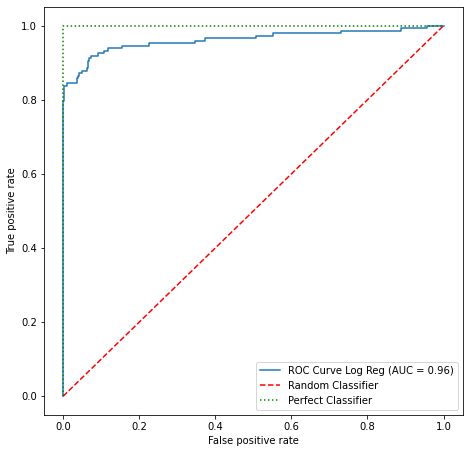

In [209]:
fpr1, tpr1, thresholds = roc_curve(y_test, probs[:, 1], pos_label=1)
roc_auc1 = auc(fpr1, tpr1)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
 
plt.plot(fpr1, tpr1, label='ROC Curve Log Reg (AUC = %0.2f)' % (roc_auc1))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

In [210]:
eval_met2 = print_stats(real_values, predicted_values)
eval_met2

Accuracy = 0.9990770650669127
Precision = 0.8809523809523809
Recall = 0.5377906976744186
F1 Score = 0.6678700361010831
AUC_1 Score = 0.9614445414404381


### 3. Logistic Regression with Ridge Regularization (LR2)

In [292]:
s = MinMaxScaler()
LR_L2 = LogisticRegression(penalty='l2', max_iter=100, solver='liblinear')


In [293]:
estimator = Pipeline([("scaler", s),
                      ("LogRegression", LR_L2)])

estimator.fit(X_train, y_train)
y_predLR = estimator.predict(X_test)
print(classification_report(y_predLR, y_test))


              precision    recall  f1-score   support

           0       0.99      0.96      0.98     96688
           1       0.96      0.99      0.97     90960

    accuracy                           0.97    187648
   macro avg       0.97      0.98      0.97    187648
weighted avg       0.98      0.97      0.97    187648



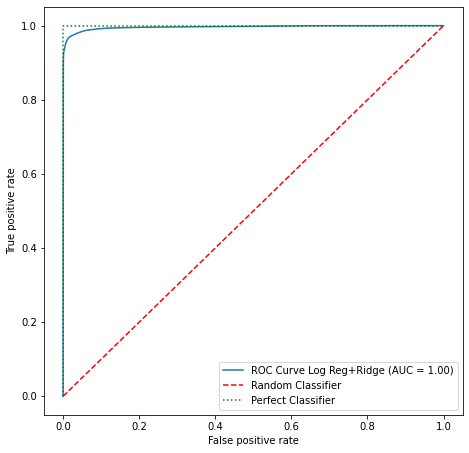

In [294]:
y_prob = estimator.predict_proba(X_test)
fpr1, tpr1, thresholds = roc_curve(y_test, y_prob[:, 1], pos_label=1)
roc_auc1 = auc(fpr1, tpr1)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
 
plt.plot(fpr1, tpr1, label='ROC Curve Log Reg+Ridge (AUC = %0.2f)' % (roc_auc1))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

In [295]:
eval_met3 = print_stats(y_test, y_predLR)
eval_met3

Accuracy = 0.9748092172578445
Precision = 0.9900285839929639
Recall = 0.9593067229128717
F1 Score = 0.9744255625348287
AUC_1 Score = 0.996035812271742


### 4. SMOTE + Logistic Regression

In [279]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

In [280]:
sm = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=4)
X_oversampled , y_oversampled = sm.fit_resample(X, y)

In [281]:
s = MinMaxScaler()
pipeline = Pipeline([('scaler',s),('model', LogisticRegression(solver='liblinear'))])

pipeline.fit(X_oversampled, y_oversampled)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [282]:
unique_original, counts_original = np.unique(y, return_counts=True)
unique_oversampled, counts_oversampled = np.unique(y_oversampled, return_counts=True)

print('Original fraud class distribution:', dict(zip(unique_original, counts_original)))
print('New transformed fraud class distribution:',dict(zip(unique_oversampled, counts_oversampled)))

Original fraud class distribution: {0: 284315, 1: 492}
New transformed fraud class distribution: {0: 284315, 1: 284315}


In [283]:
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.33, random_state=42)

In [284]:
model_lr_smt = LogisticRegression(solver='liblinear')
model_lr_smt.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [285]:
tst_lr_smt_pred = model_lr_smt.predict(X_test)
tst_lr_smt_acc = accuracy_score(tst_lr_smt_pred, y_test)
print(round(tst_lr_smt_acc*100, 2))

96.24


In [286]:
print(classification_report(tst_lr_smt_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     98141
           1       0.94      0.98      0.96     89507

    accuracy                           0.96    187648
   macro avg       0.96      0.96      0.96    187648
weighted avg       0.96      0.96      0.96    187648



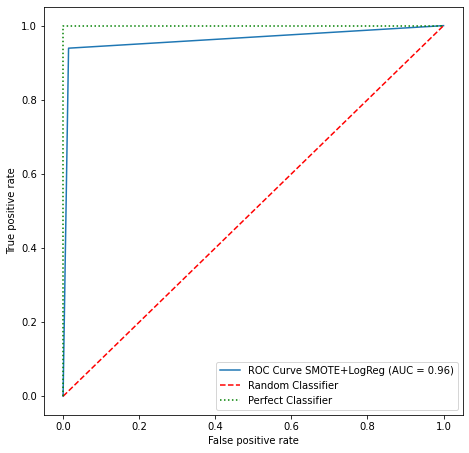

In [287]:
fpr1, tpr1, thresholds = roc_curve(y_test, tst_lr_smt_pred, pos_label=1)
roc_auc1 = auc(fpr1, tpr1)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
 
plt.plot(fpr1, tpr1, label='ROC Curve SMOTE+LogReg (AUC = %0.2f)' % (roc_auc1))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

In [288]:
eval_met4 = print_stats(y_test, tst_lr_smt_pred)
eval_met4

Accuracy = 0.9623976807639836
Precision = 0.9849732423162434
Recall = 0.9391624854857095
F1 Score = 0.9615225215399716
AUC_1 Score = 0.9624098217884426


Confusion matrix, without normalization
[[88162  5711]
 [ 1345 92430]]


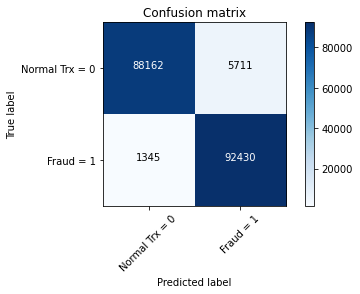

In [289]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,tst_lr_smt_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Normal Trx = 0','Fraud = 1'],normalize= False,  title='Confusion matrix')

### 5. Undersampling + Multi Layer Perceptron Classifier (MLP Classifier)

In [262]:
number_records_fraud = len (data[data.Class==1])

fraud_indices = np.array (data[data.Class==1].index)

normal_indices = np.array (data[data.Class==0].index)

In [298]:
normal_indices.shape

(284315,)

In [300]:
number_records_fraud

492

In [263]:
random_normal_indices = np.random.choice (normal_indices, number_records_fraud, replace = False )

under_sample_indices = np.concatenate ([fraud_indices, random_normal_indices])

In [264]:
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.iloc [:, under_sample_data.columns != 'Class'];

y_undersample = under_sample_data.iloc [:, under_sample_data.columns == 'Class'];

In [301]:
y_undersample.shape

(984, 1)

In [265]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split (X_undersample,y_undersample, test_size = 0.3, random_state = 42)

In [266]:
from sklearn.neural_network import MLPClassifier

In [267]:
MLPC = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)

s = MinMaxScaler()
pipeline = Pipeline([('scaler',s),('mlpc', MLPC)])

pipeline.fit(X_train_under, y_train_under)

y_predMLPC = pipeline.predict(X_test_under)

In [268]:
print(classification_report(y_predMLPC,y_test_under))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       158
           1       0.89      0.97      0.93       138

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.94      0.93      0.93       296



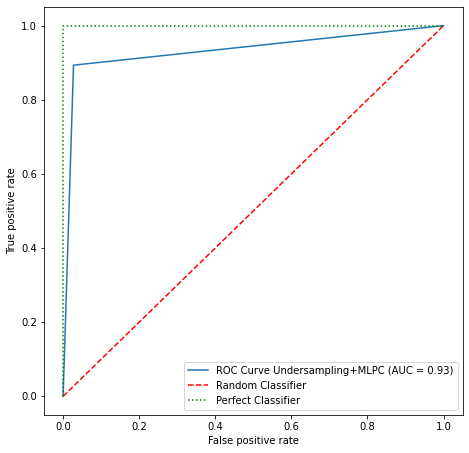

In [269]:
fpr1, tpr1, thresholds = roc_curve(y_test_under, y_predMLPC, pos_label=1)
roc_auc1 = auc(fpr1, tpr1)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
 
plt.plot(fpr1, tpr1, label='ROC Curve Undersampling+MLPC (AUC = %0.2f)' % (roc_auc1))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

In [270]:
eval_met5 = print_stats(y_test_under, y_predMLPC)
eval_met5

Accuracy = 0.9324324324324325
Precision = 0.9710144927536232
Recall = 0.8933333333333333
F1 Score = 0.9305555555555556
AUC_1 Score = 0.9329680365296803


In [272]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test_under, y_predMLPC, labels=[1,0]))

[[134  16]
 [  4 142]]


Confusion matrix, without normalization
[[134  16]
 [  4 142]]


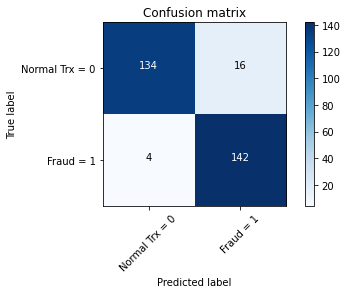

In [274]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_under, y_predMLPC, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Normal Trx = 0','Fraud = 1'],normalize= False,  title='Confusion matrix')

### 6. AutoEncoder 

In [234]:
import tensorflow as tf

In [235]:
sc=StandardScaler()
data['Amount'] = sc.fit_transform(data['Amount'].values.reshape(-1, 1))

In [236]:
raw_data = data.values
# The last element contains if the transaction is normal which is represented by a 0 and if fraud then 1
labels = raw_data[:, -1]
data = raw_data[:, 0:-1]
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.3, random_state=42)

In [237]:
#same with MinMaxScaler for each train and test data separately
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)
train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [238]:
train_labels = train_labels.astype(bool) 
test_labels = test_labels.astype(bool)

#creating normal and fraud datasets
normal_train_data = train_data[~train_labels]
normal_test_data = test_data[~test_labels]

fraud_train_data = train_data[train_labels]
fraud_test_data = test_data[test_labels]

print(" No. of records in Fraud Train Data=", len(fraud_train_data))
print(" No. of records in Normal Train data=",len(normal_train_data))
print(" No. of records in Fraud Test Data=",len(fraud_test_data))
print(" No. of records in Normal Test data=",len(normal_test_data))

 No. of records in Fraud Train Data= 356
 No. of records in Normal Train data= 199008
 No. of records in Fraud Test Data= 136
 No. of records in Normal Test data= 85307


In [239]:
nb_epoch = 10
batch_size = 64
input_dim = 30 #normal_train_data.shape[1] #num of columns, 30
encoding_dim = 14
hidden_dim_1 = 7
learning_rate = 1e-7

In [240]:
#input Layer
input_layer = tf.keras.layers.Input(shape=(input_dim, ))
#Encoder
encoder = tf.keras.layers.Dense(encoding_dim, activation="relu",                               
activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)
encoder=tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_1, activation='sigmoid')(encoder)

# Decoder
decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
decoder= tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoder)
decoder = tf.keras.layers.Dense(input_dim, activation='sigmoid')(decoder)

#Autoencoder
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense_15 (Dense)             (None, 14)                434       
_________________________________________________________________
dropout_6 (Dropout)          (None, 14)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 7)                 105       
_________________________________________________________________
dense_17 (Dense)             (None, 7)                 56        
_________________________________________________________________
dropout_7 (Dropout)          (None, 7)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 14)                112 

In [241]:
autoencoder.compile(loss='mean_squared_error',
                    optimizer='adam')

In [242]:
history = autoencoder.fit(normal_train_data, normal_train_data,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(test_data, test_data),
                    verbose='auto').history

Epoch 1/10
3110/3110 [==============================] - 7s 2ms/step - loss: 0.0095 - val_loss: 2.6822e-04
Epoch 2/10
3110/3110 [==============================] - 6s 2ms/step - loss: 2.2706e-04 - val_loss: 3.6571e-04
Epoch 3/10
3110/3110 [==============================] - 6s 2ms/step - loss: 1.5518e-04 - val_loss: 4.3644e-04
Epoch 4/10
3110/3110 [==============================] - 6s 2ms/step - loss: 1.2053e-04 - val_loss: 3.9662e-04
Epoch 5/10
3110/3110 [==============================] - 6s 2ms/step - loss: 9.9638e-05 - val_loss: 5.1097e-04
Epoch 6/10
3110/3110 [==============================] - 6s 2ms/step - loss: 8.6279e-05 - val_loss: 6.4745e-04
Epoch 7/10
3110/3110 [==============================] - 6s 2ms/step - loss: 7.3564e-05 - val_loss: 8.6000e-04
Epoch 8/10
3110/3110 [==============================] - 6s 2ms/step - loss: 5.0765e-05 - val_loss: 0.0015
Epoch 9/10
3110/3110 [==============================] - 6s 2ms/step - loss: 4.3776e-05 - val_loss: 0.0017
Epoch 10/10
3110/3110 

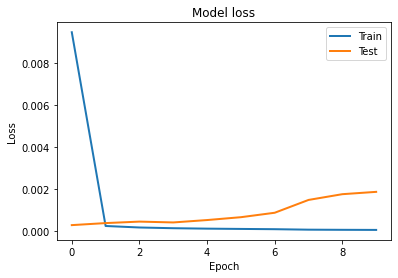

In [243]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

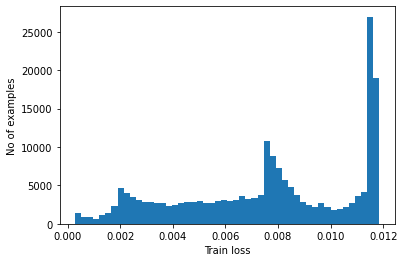

In [244]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [245]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.010921288


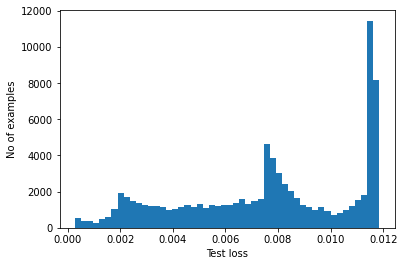

In [246]:
anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [247]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)


In [248]:
print(classification_report(test_labels, preds))

              precision    recall  f1-score   support

       False       1.00      0.10      0.18     85307
        True       0.00      0.90      0.00       136

    accuracy                           0.10     85443
   macro avg       0.50      0.50      0.09     85443
weighted avg       1.00      0.10      0.18     85443



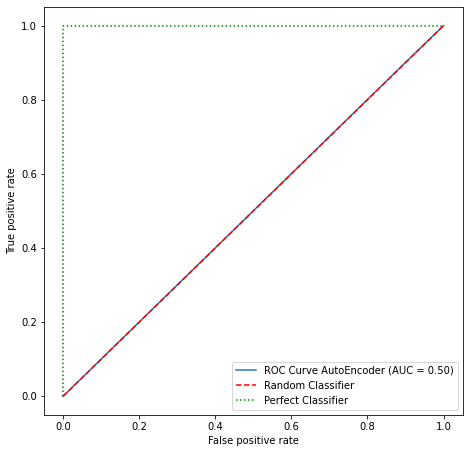

In [249]:
fpr1, tpr1, thresholds = roc_curve(test_labels, preds, pos_label=1)
roc_auc1 = auc(fpr1, tpr1)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
 
plt.plot(fpr1, tpr1, label='ROC Curve AutoEncoder (AUC = %0.2f)' % (roc_auc1))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

In [250]:
preds = predict(autoencoder, test_data, threshold)
eval_met6 = print_stats(test_labels, preds)
eval_met6

Accuracy = 0.27106960195686014
Precision = 0.001875601154216095
Recall = 0.8602941176470589
F1 Score = 0.003743041781303986
AUC_1 Score = 0.500343784283615


# Evaluation Matrix Comparison

Here are the evaluation matrix result from six models examined: 

| Algorithm            | Accuracy| Precision|Recall |F1 Score  |AUC Score |
|----------------------|---------|----------|-------|----------|--------- |
| Dummy Classifier     | 0.99    | 0.00     | 0.00  | 0.00     | 0.5 
| Vanilla Log Reg      | 0.99    | 0.88     | 0.53  | 0.66     | 0.96
| Log Reg + Ridge      | 0.97    | 0.99     | 0.95  | 0.97     | 0.99
| SMOTE + Log Reg      | 0.96    | 0.98     | 0.93  | 0.96     | 0.96
| Undersampling + MLPC | 0.93    | 0.97     | 0.89  | 0.93     | 0.93
| Auto Encoder         | 0.27    | 0.002    | 0.8   | 0.003    | 0.5